In [1]:
import xarray
import numpy
import matplotlib.pyplot as plt
import os.path
import scipy.fft

In [2]:
Smg006AH64 = xarray.open_dataset('ArakawaHsu.Smag006.64x64/prog.nc')
Smg006AH128 = xarray.open_dataset('ArakawaHsu.Smag006.128x128/prog.nc')
Smg006AH256 = xarray.open_dataset('ArakawaHsu.Smag006.256x256/prog.nc')
Smg006AH512 = xarray.open_dataset('ArakawaHsu.Smag006.512x512/prog.nc')
# Smg020AH512 = xarray.open_dataset('ArakawaHsu.Smag020.512x512/prog.nc')

In [3]:
Times=slice(-250,None)
def Zsp(ds):
    ni = ds.RV.shape[-1]-1
    zhat = scipy.fft.rfft( ds.RV.isel(Time=Times,zl=0,yq=slice(1,None),xq=slice(1,None)).data )/ni
    dx = (ds.xq[1]-ds.xq[0]).values
    k = scipy.fft.rfftfreq(ni, d=dx )
    k = 2/dx * numpy.sin( 0.5 * dx * k )
    Z = numpy.real( zhat.conjugate() * zhat ).mean(axis=(0,1))
    return k, Z

def KEsp(ds):
    ni = ds.v.shape[-1]
    uhat = scipy.fft.rfft( ds.u.isel(Time=Times,zl=0,xq=slice(1,None)).data )/ni
    vhat = scipy.fft.rfft( ds.v.isel(Time=Times,zl=0,yq=slice(1,None)).data )/ni
    dx = (ds.xq[1]-ds.xq[0]).values
    k = scipy.fft.rfftfreq(ni, d=dx )
    k = 2/dx * numpy.sin( 0.5 * dx * k )
    E = numpy.real( uhat.conjugate() * uhat + vhat.conjugate() * vhat ).mean(axis=(0,1))
    return k, E

def Zpdf(ds):
    p,b = numpy.histogram( 1e4*ds.RV.isel(Time=Times,zl=0), bins=numpy.linspace(-0.5,1.5,201));
    return 0.5*(b[:-1]+b[1:]), p/p.sum()

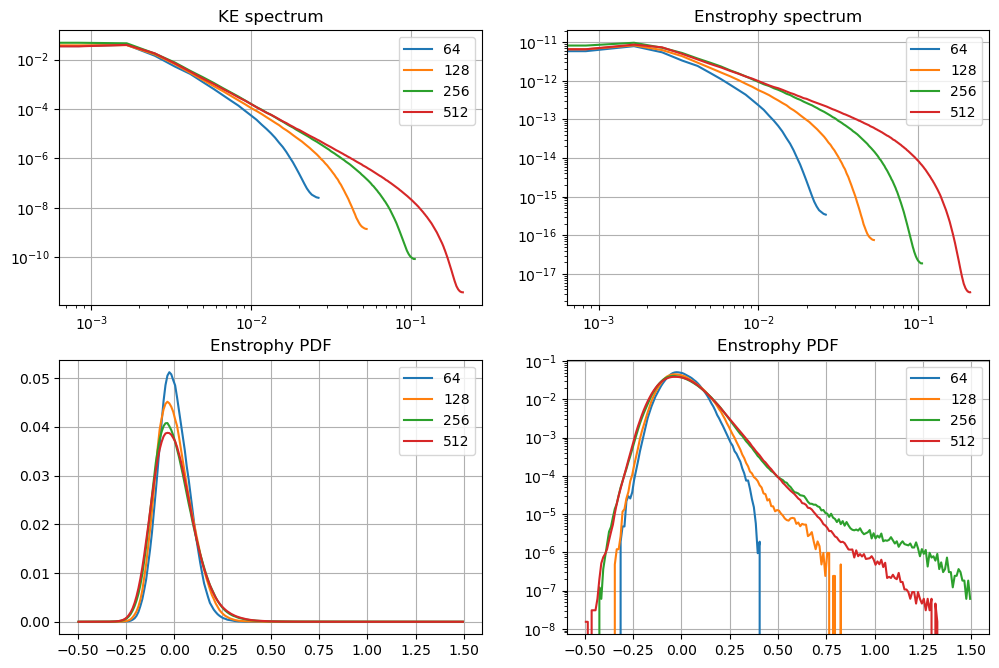

In [4]:
fig,ax = plt.subplots(2,2,dpi=100,figsize=(12,8))

def plot(ax, ds, label):
    ax[0,0].loglog( *KEsp(ds), label=label)
    ax[0,1].loglog( *Zsp(ds), label=label)
    ax[1,0].plot( *Zpdf(ds), label=label)
    ax[1,1].semilogy( *Zpdf(ds), label=label)

plot(ax, Smg006AH64, '64');
plot(ax, Smg006AH128, '128');
plot(ax, Smg006AH256, '256');
plot(ax, Smg006AH512, '512');

ax[0,0].legend(); ax[0,0].grid(); ax[0,0].set_title('KE spectrum');
ax[0,1].legend(); ax[0,1].grid(); ax[0,1].set_title('Enstrophy spectrum');
ax[1,0].legend(); ax[1,0].grid(); ax[1,0].set_title('Enstrophy PDF');
ax[1,1].legend(); ax[1,1].grid(); ax[1,1].set_title('Enstrophy PDF');


In [52]:
ESmg006AH64 = xarray.open_dataset('ArakawaHsu.Smag006.64x64/energy.nc', decode_cf=False)
ESmg006AH128 = xarray.open_dataset('ArakawaHsu.Smag006.128x128//energy.nc', decode_cf=False)
ESmg006AH256 = xarray.open_dataset('ArakawaHsu.Smag006.256x256//energy.nc', decode_cf=False)
ESmg006AH512 = xarray.open_dataset('ArakawaHsu.Smag006.512x512/energy.nc', decode_cf=False)

In [53]:
def Cor(ds):
    cor=ds.KE_Coradv-ds.KE_adv
    cor.name='Kinetic Energy Sourec from Coriolis [m3 s-3]'
    return cor

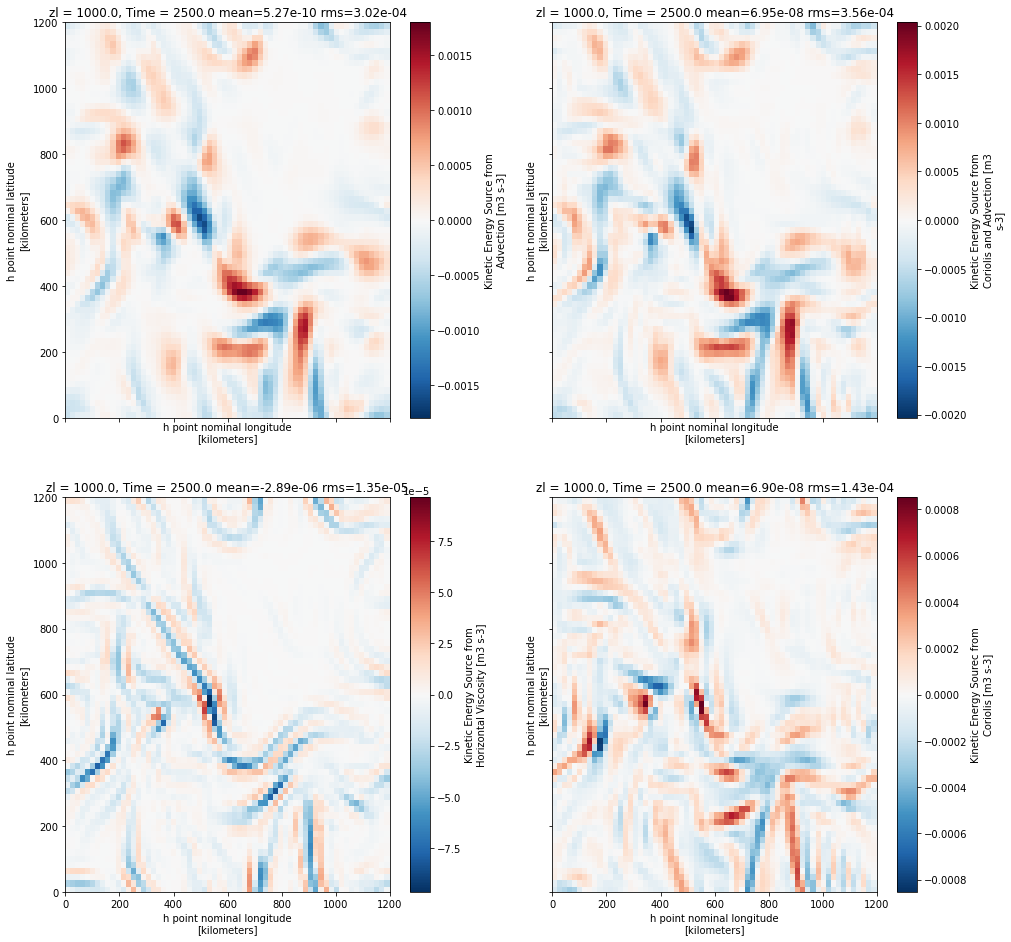

In [16]:
def plot(fld, ax, Time=-1, **kwargs):
    q = fld.isel(zl=0,Time=Time).load()
    q.plot(ax=ax, **kwargs)
    rms = numpy.sqrt((q**2).mean())
    ax.set_title(ax.title.get_text()+' mean=%.2e rms=%.2e'%(q.mean(),rms))


fig,ax=plt.subplots(2,2,figsize=(16,16),sharex=True,sharey=True);
plot( ESmg006AH64.KE_adv, ax=ax[0,0]);
plot( ESmg006AH64.KE_Coradv, ax=ax[0,1]);
plot( Cor(ESmg006AH64), ax=ax[1,1]);
plot( ESmg006AH64.KE_horvisc, ax=ax[1,0]);

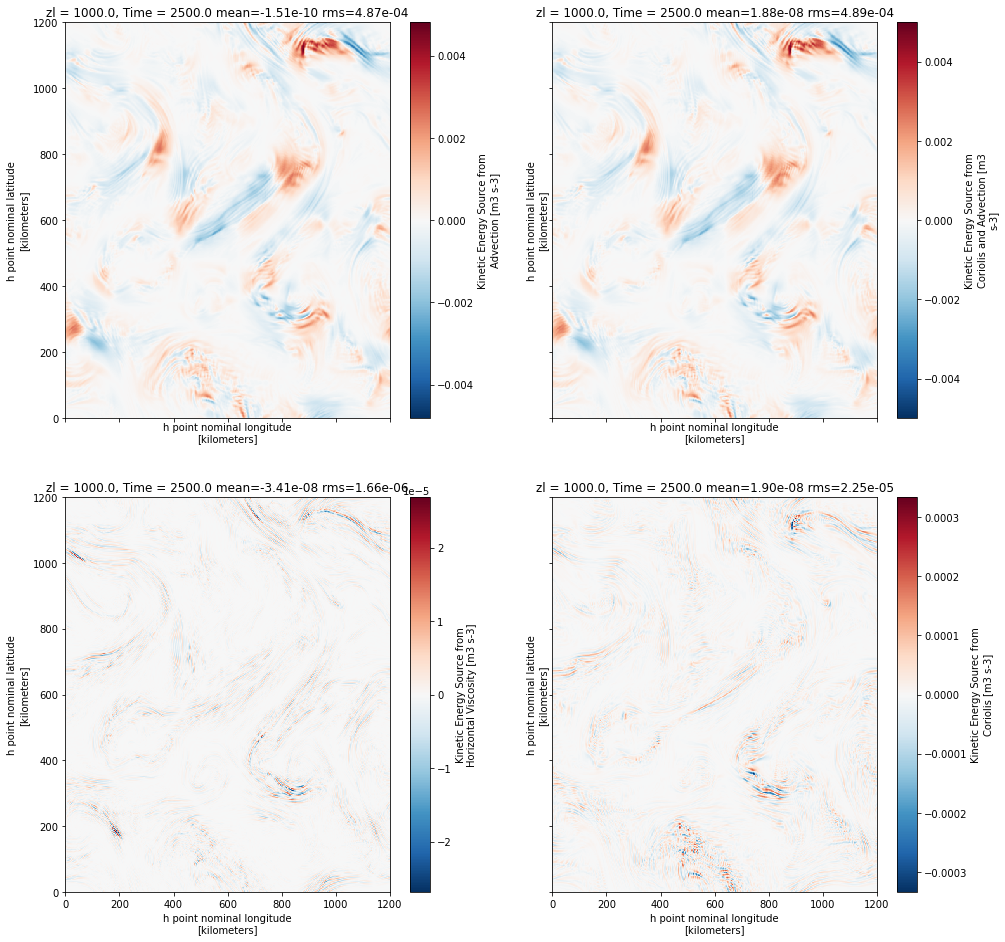

In [17]:
fig,ax=plt.subplots(2,2,figsize=(16,16),sharex=True,sharey=True);
plot( ESmg006AH512.KE_adv, ax=ax[0,0]);
plot( ESmg006AH512.KE_Coradv, ax=ax[0,1]);
plot( Cor(ESmg006AH512), ax=ax[1,1]);
plot( ESmg006AH512.KE_horvisc, ax=ax[1,0]);

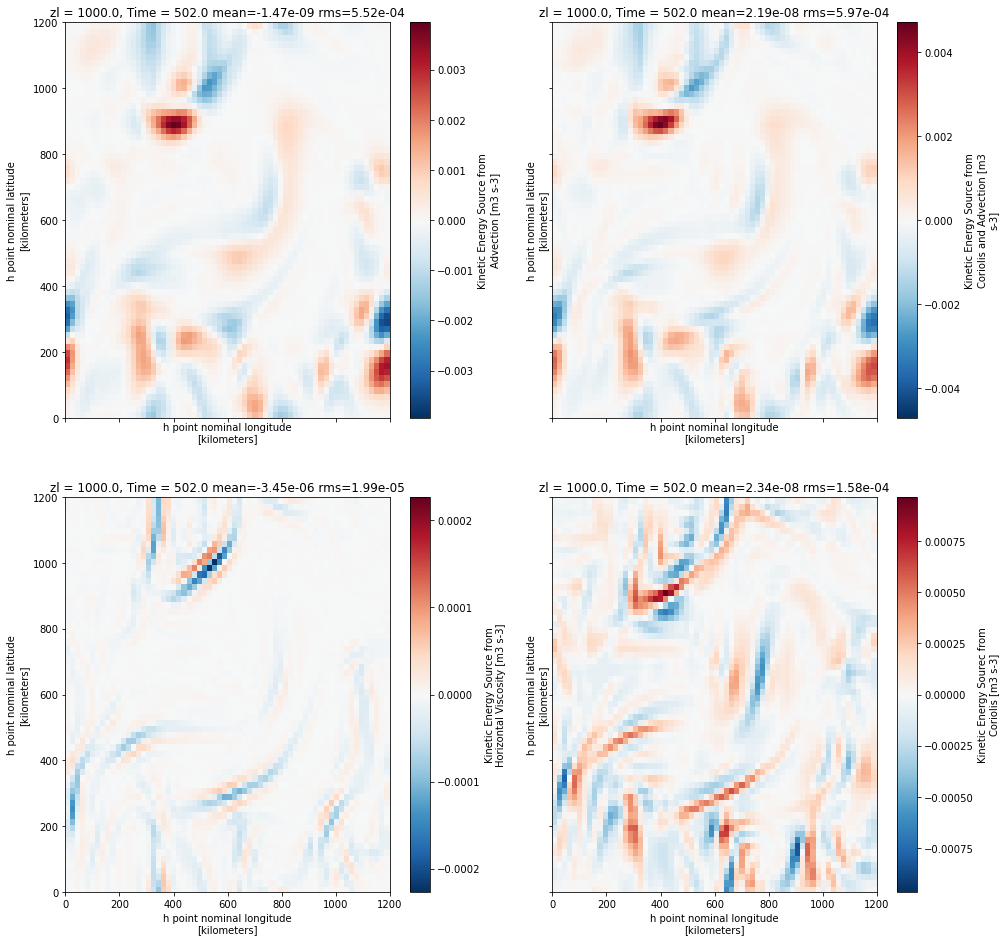

In [18]:
fig,ax=plt.subplots(2,2,figsize=(16,16),sharex=True,sharey=True);
plot( ESmg006AH64.KE_adv, ax=ax[0,0], Time=0);
plot( ESmg006AH64.KE_Coradv, ax=ax[0,1], Time=0);
plot( Cor(ESmg006AH64), ax=ax[1,1], Time=0);
plot( ESmg006AH64.KE_horvisc, ax=ax[1,0], Time=0);

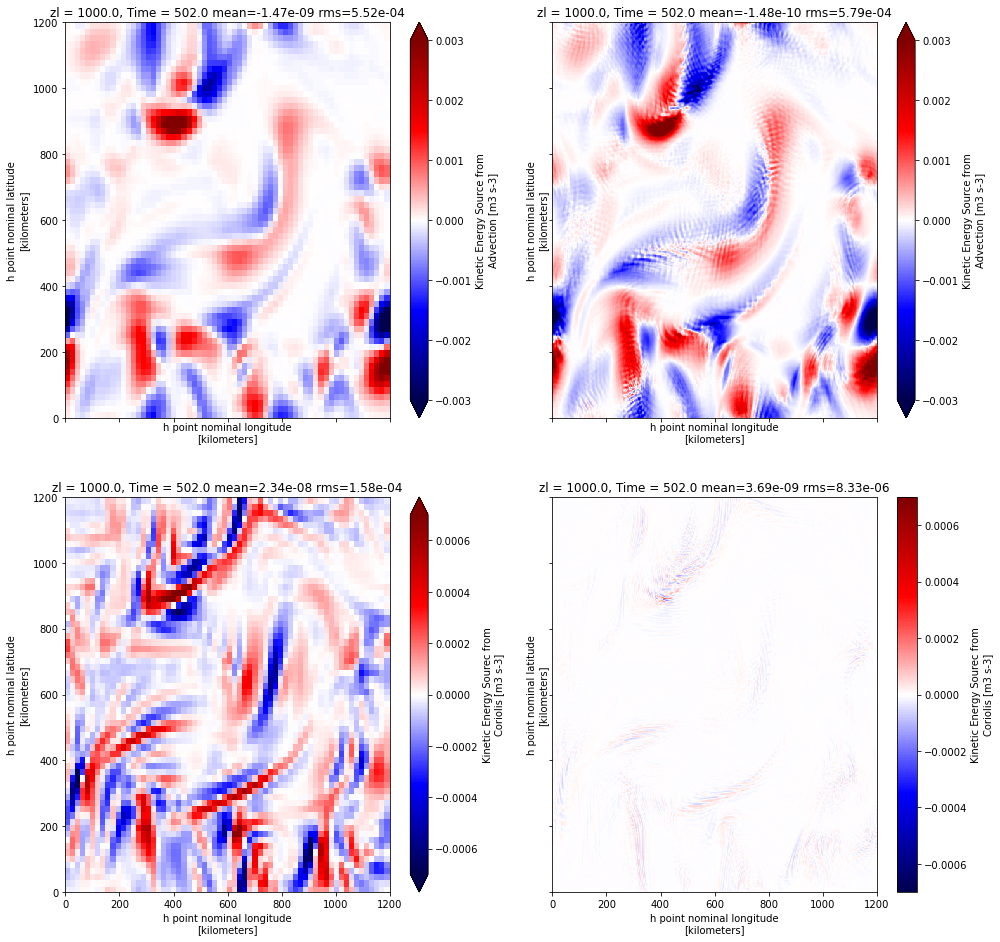

In [22]:
fig,ax=plt.subplots(2,2,figsize=(16,16),sharex=True,sharey=True);
plot( ESmg006AH64.KE_adv, ax=ax[0,0], Time=0, vmin=-.003, vmax=.003, cmap=plt.cm.seismic);
plot( ESmg006AH512.KE_adv, ax=ax[0,1], Time=0, vmin=-.003, vmax=.003, cmap=plt.cm.seismic);
plot( Cor(ESmg006AH64), ax=ax[1,0], Time=0, vmin=-.0007, vmax=.0007, cmap=plt.cm.seismic);
plot( Cor(ESmg006AH512), ax=ax[1,1], Time=0, vmin=-.0007, vmax=.0007, cmap=plt.cm.seismic);

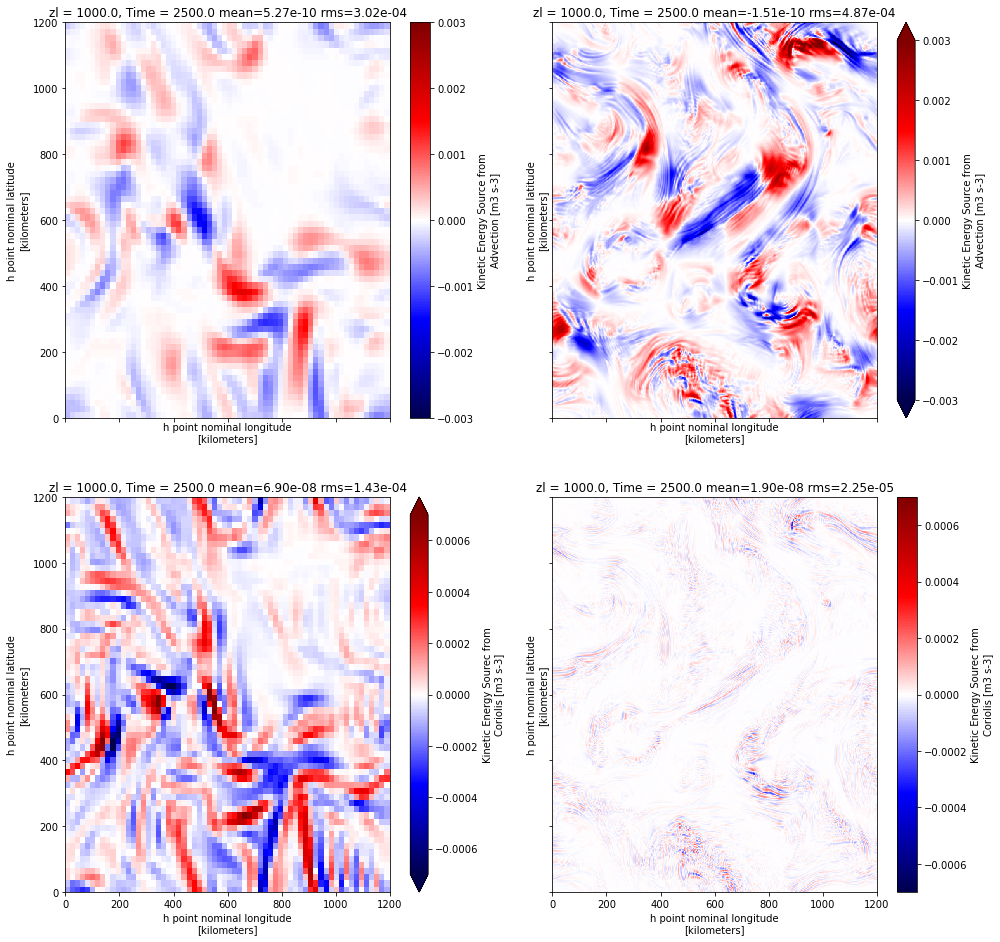

In [23]:
fig,ax=plt.subplots(2,2,figsize=(16,16),sharex=True,sharey=True);
plot( ESmg006AH64.KE_adv, ax=ax[0,0], Time=-1, vmin=-.003, vmax=.003, cmap=plt.cm.seismic);
plot( ESmg006AH512.KE_adv, ax=ax[0,1], Time=-1, vmin=-.003, vmax=.003, cmap=plt.cm.seismic);
plot( Cor(ESmg006AH64), ax=ax[1,0], Time=-1, vmin=-.0007, vmax=.0007, cmap=plt.cm.seismic);
plot( Cor(ESmg006AH512), ax=ax[1,1], Time=-1, vmin=-.0007, vmax=.0007, cmap=plt.cm.seismic);

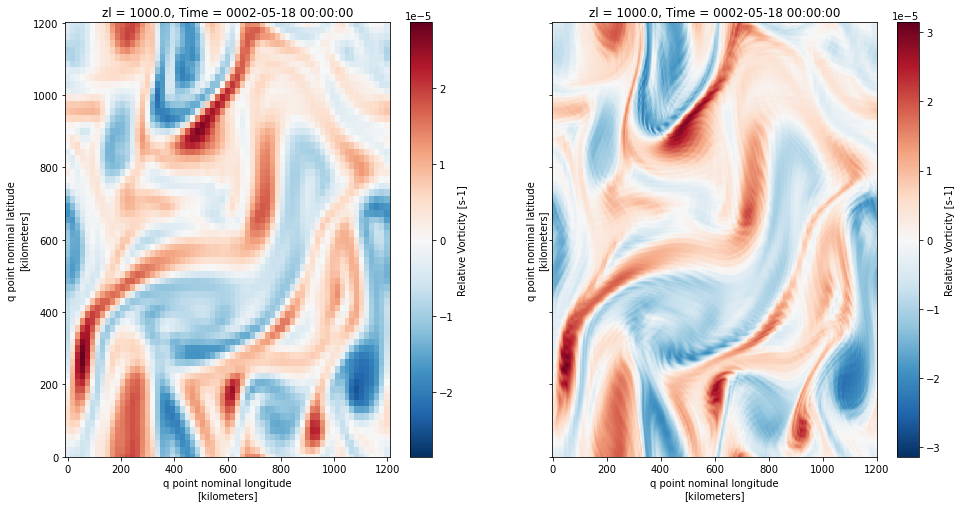

In [59]:
fig,ax=plt.subplots(1,2,figsize=(16,8),sharey=True);
Smg006AH64.RV.isel(Time=0,zl=0).plot(ax=ax[0])
Smg006AH512.RV.isel(Time=0,zl=0).plot(ax=ax[1])

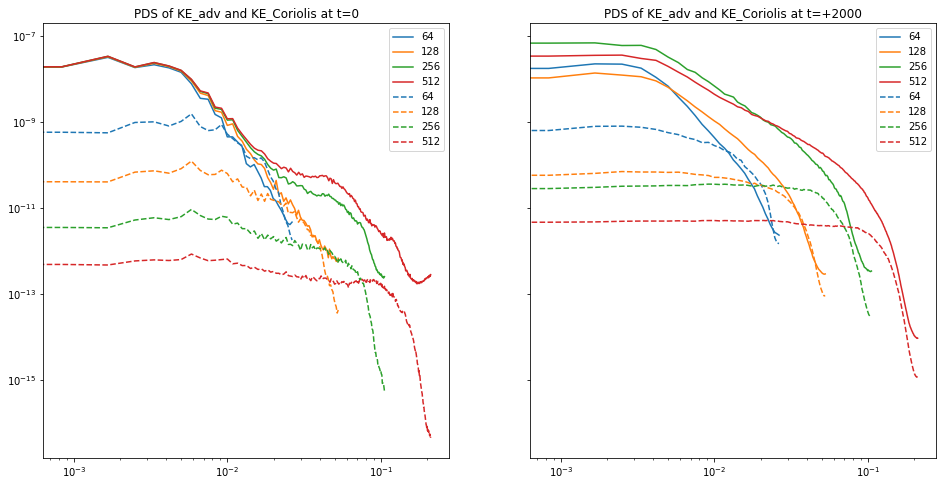

In [62]:
def spec(fld, Times):
    ni = fld.shape[-1]
    zhat = scipy.fft.rfft( fld.isel(Time=Times,zl=0).data )/ni
    dx = 1200/ni
    k = scipy.fft.rfftfreq(ni, d=dx )
    k = 2/dx * numpy.sin( 0.5 * dx * k )
    Z = numpy.real( zhat.conjugate() * zhat ).mean(axis=(0,1))
    return k, Z

fig,ax=plt.subplots(1,2,figsize=(16,8),sharey=True);

Times=slice(0,2)
plt.axes(ax[0])
plt.loglog( *spec( ESmg006AH64.KE_adv, Times), label='64')
plt.loglog( *spec( ESmg006AH128.KE_adv, Times), label='128')
plt.loglog( *spec( ESmg006AH256.KE_adv, Times), label='256')
plt.loglog( *spec( ESmg006AH512.KE_adv, Times), label='512')

plt.loglog( *spec( Cor(ESmg006AH64), Times), '--C0', label='64')
plt.loglog( *spec( Cor(ESmg006AH128), Times), '--C1', label='128')
plt.loglog( *spec( Cor(ESmg006AH256), Times), '--C2', label='256')
plt.loglog( *spec( Cor(ESmg006AH512), Times), '--C3', label='512')

plt.legend(); plt.title('PDS of KE_adv and KE_Coriolis at t=0');

Times=slice(-50,None)
plt.axes(ax[1])
plt.loglog( *spec( ESmg006AH64.KE_adv, Times), label='64')
plt.loglog( *spec( ESmg006AH128.KE_adv, Times), label='128')
plt.loglog( *spec( ESmg006AH256.KE_adv, Times), label='256')
plt.loglog( *spec( ESmg006AH512.KE_adv, Times), label='512')

plt.loglog( *spec( Cor(ESmg006AH64), Times), '--C0', label='64')
plt.loglog( *spec( Cor(ESmg006AH128), Times), '--C1', label='128')
plt.loglog( *spec( Cor(ESmg006AH256), Times), '--C2', label='256')
plt.loglog( *spec( Cor(ESmg006AH512), Times), '--C3', label='512')

plt.legend(); plt.title('PDS of KE_adv and KE_Coriolis at t=+2000');